In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [2]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
user_data.shape

(2954, 3)

In [4]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [6]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

Сколько уникальных значений принимает переменная platform?

In [7]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

Какой клиент совершил больше всего успешных операций?

In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
max_success_client = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .query('success == 41') \
    .sort_values('client', ascending=True)
max_success_client.client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы было совершено наибольшее количество успешных операций?

In [10]:
favorite_platform = logs.platform.value_counts()
favorite_platform

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

Какую платформу предпочитают премиальные клиенты?

In [11]:
full_data = user_data.merge(logs, how='inner', on='client')
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [12]:
full_data.query('premium == True') \
    .platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

C:\Users\dship\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dship\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

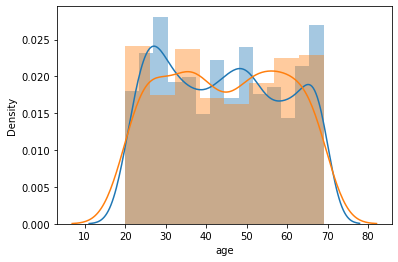

In [13]:
sns.distplot(full_data.query('premium == False').age)
sns.distplot(full_data.query('premium == True').age)

Постройте график распределения числа успешных операций: 

* x – число успешных операций
* y – число клиентов, совершивших такое количество успешных операций

In [22]:
success_client = full_data.groupby('client') \
    .agg({'success': 'sum'})

<AxesSubplot:>

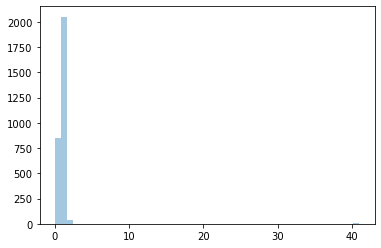

In [23]:
sns.distplot(success_client, kde=False)

In [25]:
success_client.success.value_counts()

1     2051
0      850
2       42
41       9
3        1
40       1
Name: success, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [26]:
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [34]:
client_computer = full_data.query('platform == "computer"') \
                           .groupby('age', as_index=False) \
                           .agg({'success': 'sum'})

<AxesSubplot:xlabel='age', ylabel='success'>

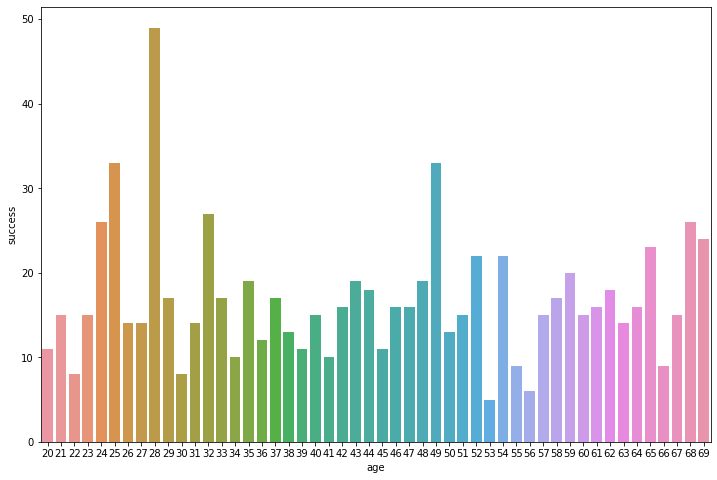

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x=client_computer.age, y=client_computer.success)

In [38]:
client_computer_v2 = full_data.query('platform == "computer" and success == True')

C:\Users\dship\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

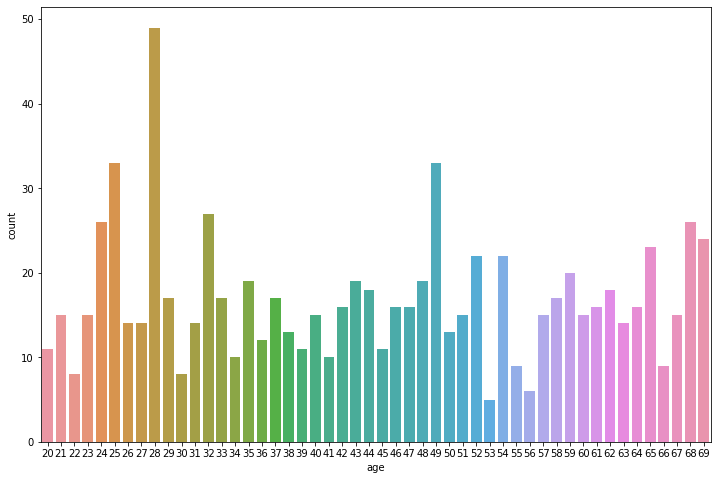

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(client_computer_v2.age)